## PJ по курсу "Глубокие нейронные сети"
## Ольга Юрлова

### Курс "Data Science in Medicine"

# Проект по применению моделей машинного обучения для предсказания сердечно-сосудистых заболеваний (ССЗ)

## Цель проекта:

    1. Изучите и напишите краткое содержание научной статьи.
    2. Проанализируйте данные.
    3. Проведите корреляционный анализ.
    4. Обучите следующие модели и сравните результаты:
        - Logistic Regression;
        - Randomforest;
        - Neural Network.


## Библиотеки и загрузка данных

In [109]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: matplotlib in c:\users\okayu\appdata\local\programs\python\python39\lib\site-packages (from missingno) (3.5.2)


In [110]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: namex in c:\users\okayu\appdata\local\programs\python\python39\lib\site-packages (from keras>=3.2.0->tensorflow-intel==2.17.0->tensorflow) (0.0.8)



In [111]:
import pandas as pd
import numpy as np
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [112]:
df = pd.read_csv("train.csv")

In [113]:
df_test = pd.read_csv("test.csv")

In [114]:
df.shape, df_test.shape

((600000, 15), (400000, 14))

In [115]:
df.head()

,ID,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,0,49.207124,0,4.000000,162.996167,181.108682,0,0,148.227858,1,0.944547,2,0,3,1
1,1,53.628425,1,1.741596,130.233730,276.474630,0,2,152.917139,0,0.119070,2,0,3,0
2,2,49.591426,1,4.000000,146.999012,223.300517,1,2,102.352090,1,1.616747,2,2,7,1
3,3,58.991445,1,4.000000,112.369143,187.245501,0,0,158.164750,1,0.000000,1,1,7,1
4,4,51.053602,1,1.954609,138.032047,238.482868,0,0,172.540828,0,1.150464,1,1,3,0


In [116]:
df_test.head()

,ID,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal
0,600000,53.963191,1,4.000000,136.940829,236.862814,0,2,143.961525,1,0.711100,1,2,7
1,600001,49.621479,1,4.000000,122.024651,226.593019,0,2,112.220874,1,0.000000,1,1,7
2,600002,36.933893,1,1.300924,127.585643,351.061046,0,0,177.945922,0,0.313078,1,0,7
3,600003,54.884588,1,3.000000,124.876745,250.370530,0,0,153.176526,0,0.308277,1,1,7
4,600004,71.016392,0,1.746972,120.922600,210.979710,0,0,164.573122,0,1.021370,1,1,3


Датасет содержит 600 000 записей в обучающем наборе и 400 000 в тестовом. Обучающий набор содержит целевую переменную наличия или отсутствия ССЗ. Каждая запись содержит id пациента и 13 признаков:

    Age (возраст);
    Sex (пол);
    Chest (боль в груди от 1 до 4);
    Resting_blood_pressure (артериальное давление в состоянии покоя);
    Serum_cholestoral (уровень холестерина в крови mg/dl);
    Fasting_blood_sugar (анализ глюкозы в крови натощак (> 120 mg/dl));
    Resting_electrocardiographic_results (результаты электрокардиографических исследований в покое 0, 1, 2);
    Maximum_heart_rate_achieved (максимальная частота сердечных сокращений);
    Exercise_induced_angina (стенокардия при нагрузке),
    Oldpeak (депрессия ST-сегмента);
    Slope (наклон пикового сегмента ST при физической нагрузке);
    Number_of_major_vessels (количество крупных сосудов (0-3), окрашенных с помощью флюороскопии);
    Thal (3 = норма; 6 = фиксированный дефект; 7 = обратимый дефект);
    class target (0 - отсутствие, 1 - наличие ССЗ)


## Анализ данных

<AxesSubplot:>

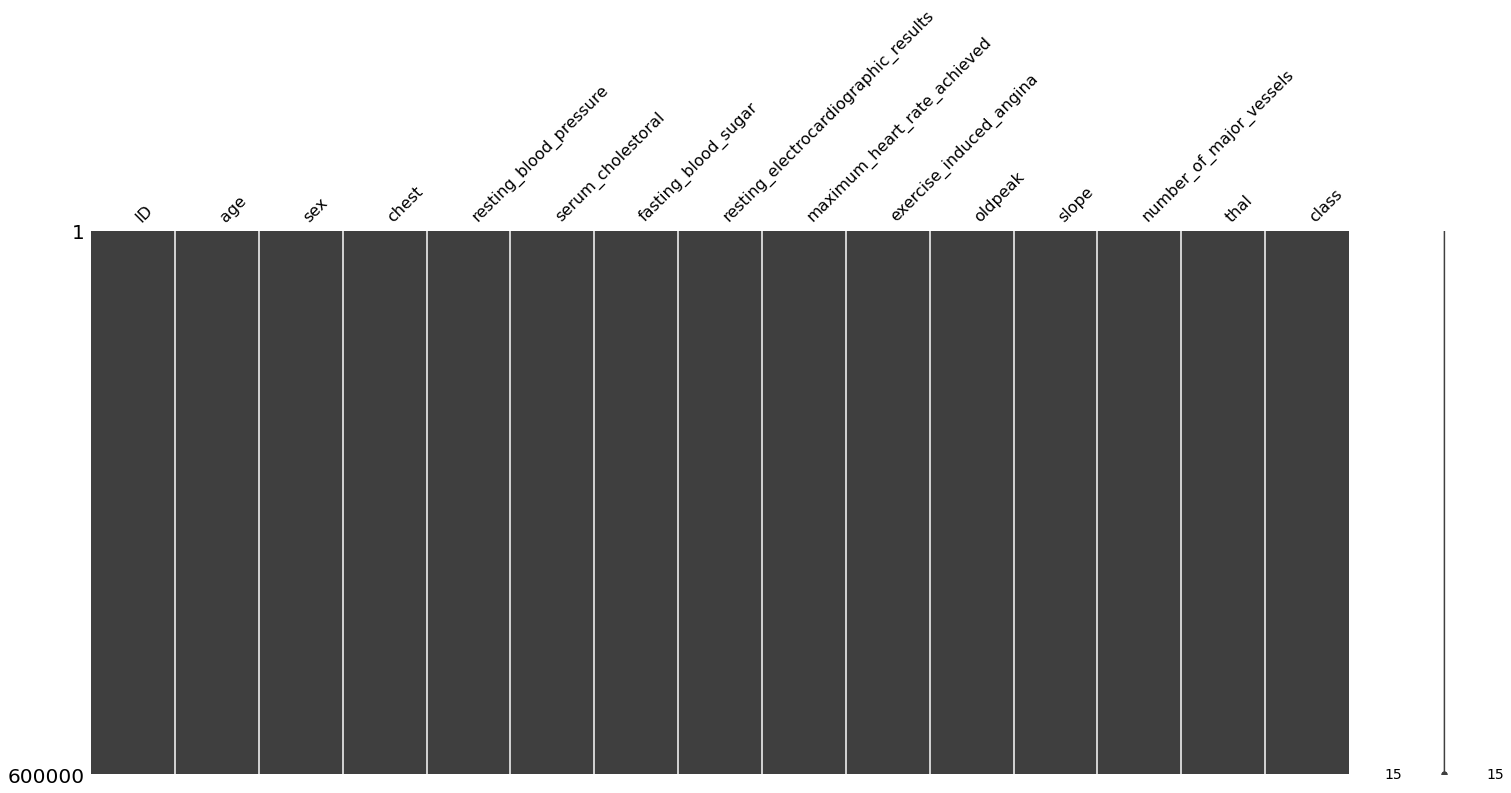

In [117]:
# Проверка пропущенных значений
missingno.matrix(df)

<AxesSubplot:>

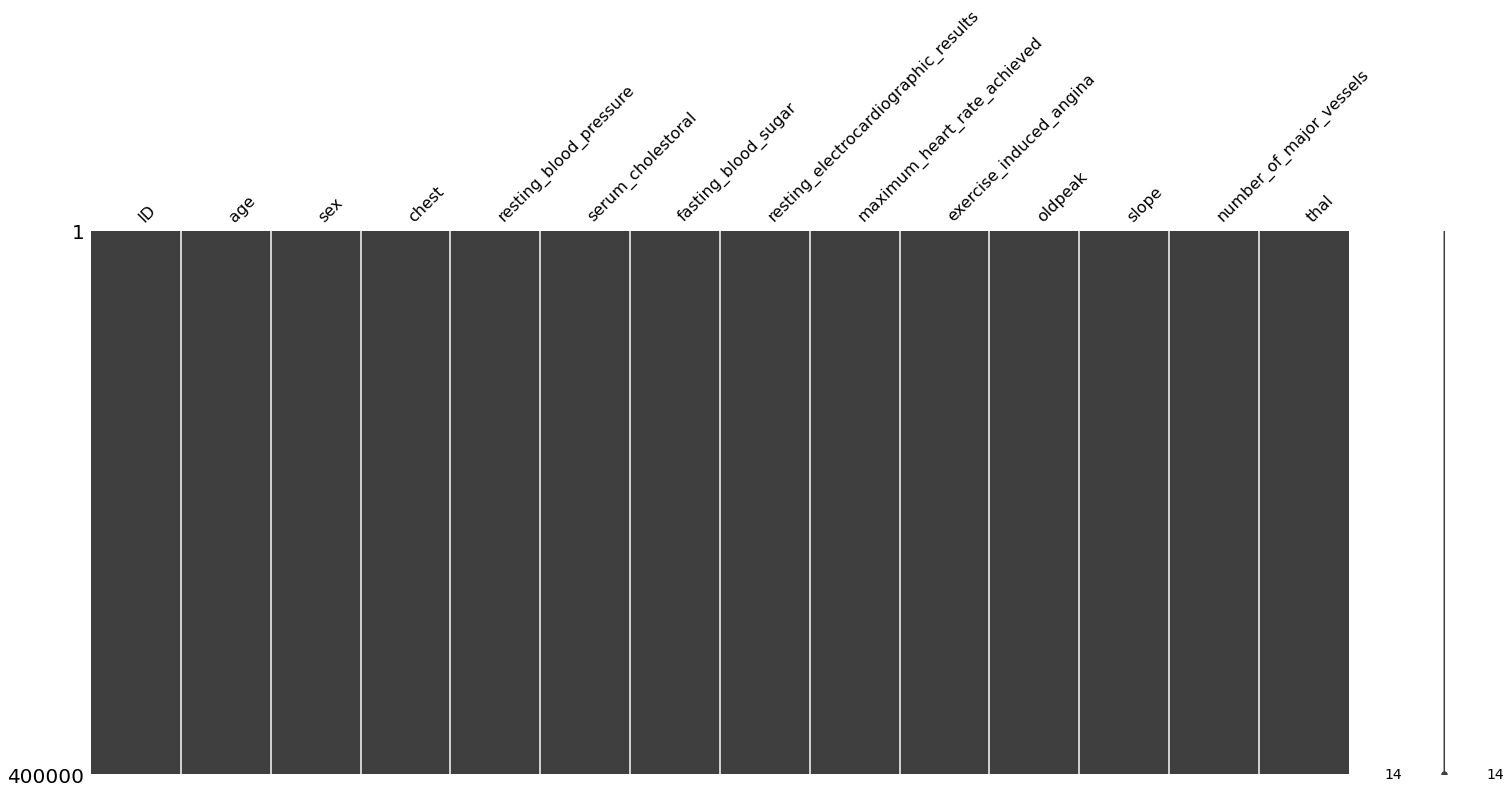

In [118]:
# Проверка пропущенных значений
missingno.matrix(df_test)

In [119]:
# Проверка на дупликаты
df.duplicated().any()

False

In [120]:
# Проверка на дупликаты
df_test.duplicated().any()

False

In [121]:
df.dtypes

ID                                        int64
age                                     float64
sex                                       int64
chest                                   float64
resting_blood_pressure                  float64
serum_cholestoral                       float64
fasting_blood_sugar                       int64
resting_electrocardiographic_results      int64
maximum_heart_rate_achieved             float64
exercise_induced_angina                   int64
oldpeak                                 float64
slope                                     int64
number_of_major_vessels                   int64
thal                                      int64
class                                     int64
dtype: object

In [122]:
df_test.dtypes

ID                                        int64
age                                     float64
sex                                       int64
chest                                   float64
resting_blood_pressure                  float64
serum_cholestoral                       float64
fasting_blood_sugar                       int64
resting_electrocardiographic_results      int64
maximum_heart_rate_achieved             float64
exercise_induced_angina                   int64
oldpeak                                 float64
slope                                     int64
number_of_major_vessels                   int64
thal                                      int64
dtype: object

### В датасетах отсутствуют дупликаты и пропущенные значения. Несмотря на то, что тип данных числовой, смысл данных варьируется от числовых показателей до категориальных переменных. Необходимо переприсвоение типов данных в соответствии со смысловыми значениями и, как следствие, оценкой корреляции с целевой переменной.

In [123]:
# Копирование датасетов для предобработки
df_pre = df.copy()
df_test_pre = df_test.copy()

In [124]:
# Копирование колонки ID в тестовом датасете для последующего сохранения в результирующий файл
ID=df_test_pre['ID'].copy()
df_test_pre1 = pd.concat([ID,df_test_pre],axis=1)


In [125]:
df_pre = df_pre.drop(['ID'],axis=1)
df_test_pre = df_test_pre.drop(['ID'],axis=1)

In [126]:
# Преобразование данных для предобработки
df_pre['age']=df_pre['age'].astype(int)
df_pre['chest']=df_pre['chest'].astype(int)

df_test_pre['age']=df_test_pre['age'].astype(int)
df_test_pre['chest']=df_test_pre['chest'].astype(int)

In [127]:
df_pre['sex']=df_pre['sex'].astype(object)
df_pre['chest']=df_pre['chest'].astype(object)
df_pre['fasting_blood_sugar']=df_pre['fasting_blood_sugar'].astype(object)
df_pre['resting_electrocardiographic_results']=df_pre['resting_electrocardiographic_results'].astype(object)
df_pre['exercise_induced_angina']=df_pre['exercise_induced_angina'].astype(object)
df_pre['slope']=df_pre['slope'].astype(object)
df_pre['number_of_major_vessels']=df_pre['number_of_major_vessels'].astype(object)
df_pre['thal']=df_pre['thal'].astype(object)

df_test_pre['sex']=df_test_pre['sex'].astype(object)
df_test_pre['chest']=df_test_pre['chest'].astype(object)
df_test_pre['fasting_blood_sugar']=df_test_pre['fasting_blood_sugar'].astype(object)
df_test_pre['resting_electrocardiographic_results']=df_test_pre['resting_electrocardiographic_results'].astype(object)
df_test_pre['exercise_induced_angina']=df_test_pre['exercise_induced_angina'].astype(object)
df_test_pre['slope']=df_test_pre['slope'].astype(object)
df_test_pre['number_of_major_vessels']=df_test_pre['number_of_major_vessels'].astype(object)
df_test_pre['thal']=df_test_pre['thal'].astype(object)

In [128]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 14 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   age                                   600000 non-null  int32  
 1   sex                                   600000 non-null  object 
 2   chest                                 600000 non-null  object 
 3   resting_blood_pressure                600000 non-null  float64
 4   serum_cholestoral                     600000 non-null  float64
 5   fasting_blood_sugar                   600000 non-null  object 
 6   resting_electrocardiographic_results  600000 non-null  object 
 7   maximum_heart_rate_achieved           600000 non-null  float64
 8   exercise_induced_angina               600000 non-null  object 
 9   oldpeak                               600000 non-null  float64
 10  slope                                 600000 non-null  object 
 11  

In [129]:
df_pre.head()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,49,0,4,162.996167,181.108682,0,0,148.227858,1,0.944547,2,0,3,1
1,53,1,1,130.233730,276.474630,0,2,152.917139,0,0.119070,2,0,3,0
2,49,1,4,146.999012,223.300517,1,2,102.352090,1,1.616747,2,2,7,1
3,58,1,4,112.369143,187.245501,0,0,158.164750,1,0.000000,1,1,7,1
4,51,1,1,138.032047,238.482868,0,0,172.540828,0,1.150464,1,1,3,0


In [130]:
df_test_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 13 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   age                                   400000 non-null  int32  
 1   sex                                   400000 non-null  object 
 2   chest                                 400000 non-null  object 
 3   resting_blood_pressure                400000 non-null  float64
 4   serum_cholestoral                     400000 non-null  float64
 5   fasting_blood_sugar                   400000 non-null  object 
 6   resting_electrocardiographic_results  400000 non-null  object 
 7   maximum_heart_rate_achieved           400000 non-null  float64
 8   exercise_induced_angina               400000 non-null  object 
 9   oldpeak                               400000 non-null  float64
 10  slope                                 400000 non-null  object 
 11  

In [131]:
df_test_pre.head()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal
0,53,1,4,136.940829,236.862814,0,2,143.961525,1,0.711100,1,2,7
1,49,1,4,122.024651,226.593019,0,2,112.220874,1,0.000000,1,1,7
2,36,1,1,127.585643,351.061046,0,0,177.945922,0,0.313078,1,0,7
3,54,1,3,124.876745,250.370530,0,0,153.176526,0,0.308277,1,1,7
4,71,0,1,120.922600,210.979710,0,0,164.573122,0,1.021370,1,1,3


## Предобработка данных

In [132]:
# Разделение данных на категориальные и числовые
num_data = df_pre.select_dtypes(include=np.number)
cat_data = df_pre.select_dtypes(exclude=np.number)

num_data_test = df_test_pre.select_dtypes(include=np.number)
cat_data_test = df_test_pre.select_dtypes(exclude=np.number)

In [133]:
num_data.columns

Index(['age', 'resting_blood_pressure', 'serum_cholestoral',
       'maximum_heart_rate_achieved', 'oldpeak', 'class'],
      dtype='object')

In [134]:
cat_data.columns

Index(['sex', 'chest', 'fasting_blood_sugar',
       'resting_electrocardiographic_results', 'exercise_induced_angina',
       'slope', 'number_of_major_vessels', 'thal'],
      dtype='object')

In [135]:
num_data.describe(include='all')

,age,resting_blood_pressure,serum_cholestoral,maximum_heart_rate_achieved,oldpeak,class
count,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000
mean,53.926715,131.340485,249.592420,149.592069,1.051391,0.444185
std,9.091247,17.842450,51.699976,23.072593,1.144288,0.496875
min,26.000000,82.918527,98.326263,61.844168,-0.806788,0.000000
25%,48.000000,119.924094,216.475964,135.704237,0.000000,0.000000
50%,55.000000,129.727941,244.233699,153.224828,0.811101,0.000000
75%,60.000000,139.915216,274.345453,165.165497,1.674081,1.000000
max,79.000000,209.673650,527.755764,208.735196,6.803372,1.000000


In [136]:
num_data_test.describe(include='all')

,age,resting_blood_pressure,serum_cholestoral,maximum_heart_rate_achieved,oldpeak
count,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000
mean,53.907395,131.369647,249.593475,149.659088,1.050086
std,9.105221,17.862279,51.720531,23.065911,1.140986
min,27.000000,85.830892,94.958220,58.964662,-0.601414
25%,48.000000,119.942167,216.455450,135.818008,0.000000
50%,55.000000,129.735888,244.273212,153.337116,0.816276
75%,60.000000,139.935499,274.357993,165.216643,1.671519
max,80.000000,212.300808,527.712687,207.412021,6.856219


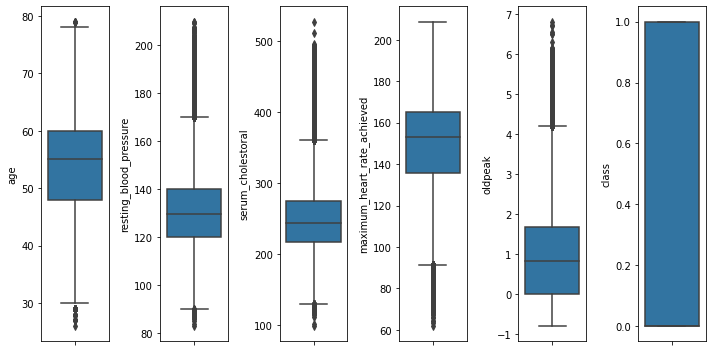

In [137]:
# Проверка числовых данных на выбросы
col_num = num_data.columns
plt.figure(figsize=(10,5))
for i in range(0,len(col_num)):
    plt.subplot(1,len(col_num),i+1)
    sns.boxplot(y=df_pre[col_num[i]])
    plt.tight_layout()

In [138]:
# Обработка выбросов
for i in col_num:
    Q1 = df_pre[i].quantile(0.25)
    Q3 = df_pre[i].quantile(0.75)
    IQR = Q3-Q1
    LowerBound = Q1 - (1.5 * IQR)
    UpperBound = Q3 + (1.5 * IQR)

    df_pre = df_pre[(df_pre[i] >= LowerBound)&(df_pre[i] <= UpperBound)]

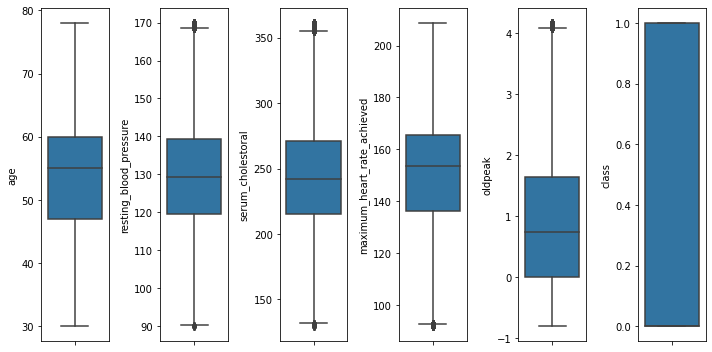

In [139]:
# Проверка числовых данных после обработки выбросов

plt.figure(figsize=(10,5))
for i in range(0,len(col_num)):
    plt.subplot(1,len(col_num),i+1)
    sns.boxplot(y = df_pre[col_num[i]])
    plt.tight_layout()

In [140]:
df_pre.shape

(543161, 14)

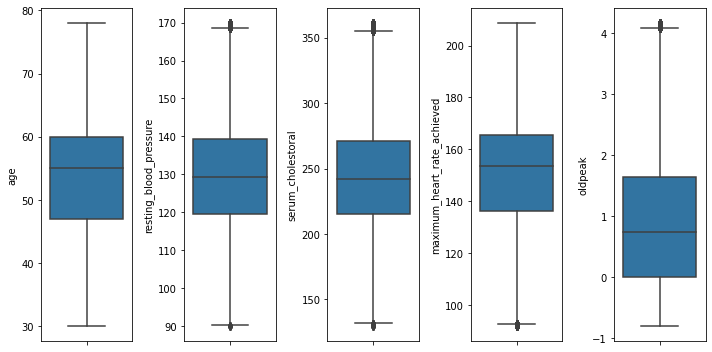

In [141]:
# Проверка числовых данных на выбросы
col_num = num_data_test.columns
plt.figure(figsize=(10,5))
for i in range(0,len(col_num)):
    plt.subplot(1,len(col_num),i+1)
    sns.boxplot(y=df_pre[col_num[i]])
    plt.tight_layout()

In [142]:
# Обработка выбросов
for i in col_num:
    Q1 = df_test_pre[i].quantile(0.25)
    Q3 = df_test_pre[i].quantile(0.75)
    IQR = Q3-Q1
    LowerBound = Q1 - (1.5 * IQR)
    UpperBound = Q3 + (1.5 * IQR)

    df_test_pre = df_test_pre[(df_test_pre[i] >= LowerBound)&(df_pre[i] <= UpperBound)]

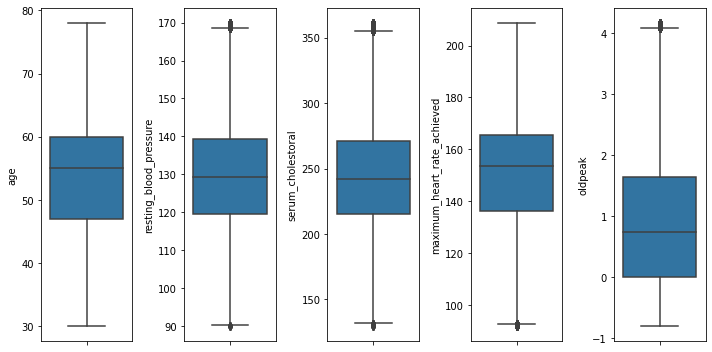

In [143]:
# Проверка числовых данных после обработки выбросов

plt.figure(figsize=(10,5))
for i in range(0,len(col_num)):
    plt.subplot(1,len(col_num),i+1)
    sns.boxplot(y = df_pre[col_num[i]])
    plt.tight_layout()

In [144]:
df_test_pre.shape

(359813, 13)

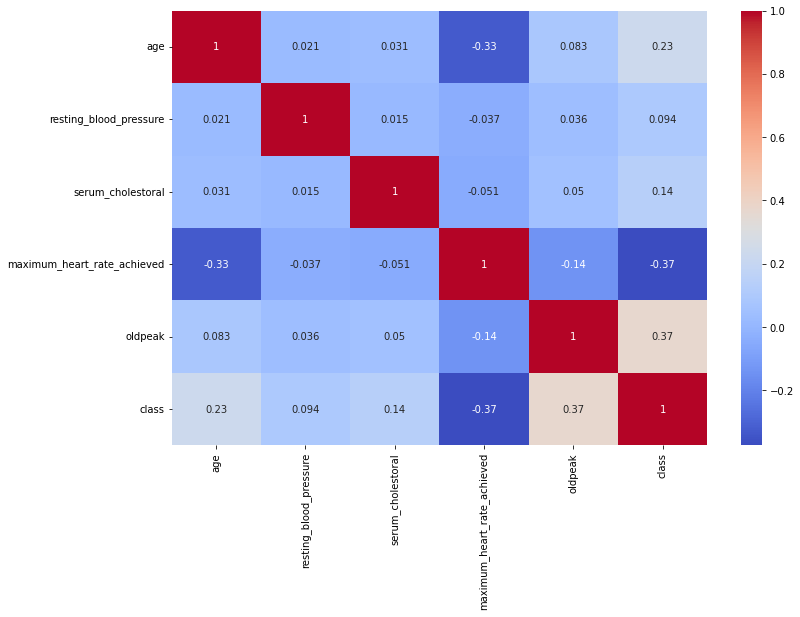

In [145]:
# Корреляция данных на correlation matrix
corr_matrix = df_pre.select_dtypes(include=np.number).corr(method='spearman')

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

### Анализ корреляции числовых данных показал значимую корреляция признаков 'oldpeak',  'age', 'serum_cholestoral' с целевой переменной. Признаки 'resting_blood_pressure', 'maximum_heart_rate_achieved' имеет смысл не учитывать при обучении моделей.

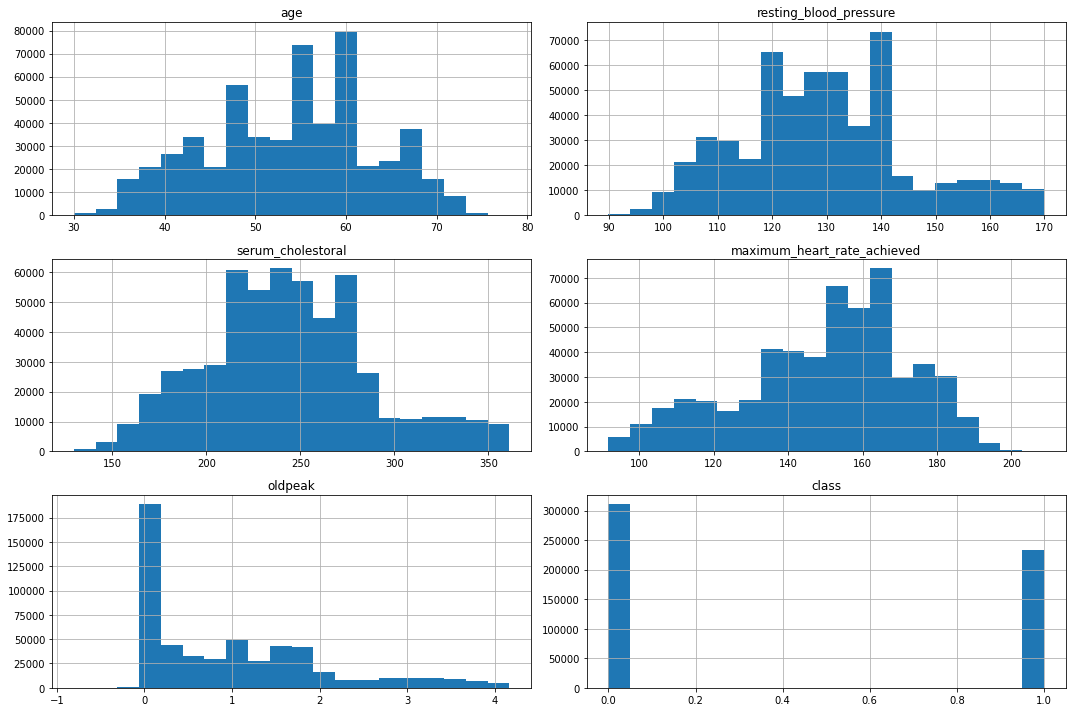

In [146]:
# Построение Plot histogram для числовых признаков
df_pre.select_dtypes(include=np.number).hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [147]:
df_pre.drop(['maximum_heart_rate_achieved','resting_blood_pressure',], axis=1, inplace=True)

In [148]:
df_test_pre.drop(['maximum_heart_rate_achieved','resting_blood_pressure',], axis=1, inplace=True)

## Подготовка датасета к обучению

In [149]:
# Разделение данных на features и target
X = df_pre.drop('class', axis=1)
y = df_pre['class']

In [150]:
# Конвертация категориальных переменных в dummy переменные
X_dummies = pd.get_dummies(X, drop_first=True)  # drop_first=True для уменьшения мультиколлинеарности 

df_test_dummies = pd.get_dummies(df_test_pre, drop_first=True) 

In [151]:
# Разделение на train и test датасеты
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.2, random_state=42)

In [152]:
# Инициализация StandardScaler
scaler = StandardScaler()

In [153]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

df_test_scaled = df_test_dummies.copy()

In [154]:
# Выделение числовых данных для стандартизации
numeric_columns = X_train.select_dtypes(include=np.number).columns

numeric_columns_test = df_test_dummies.select_dtypes(include=np.number).columns

In [155]:
# Стандартизация числовых данных
X_train_scaled[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test_scaled[numeric_columns] = scaler.transform(X_test[numeric_columns])

df_test_scaled[numeric_columns_test] = scaler.fit_transform(df_test_dummies[numeric_columns_test])

In [156]:
X_train_scaled.shape, X_test_scaled.shape, y_train.shape

((434528, 19), (108633, 19), (434528,))

In [157]:
y_train.value_counts()

class
0    248474
1    186054
Name: count, dtype: int64

In [158]:
df_test_scaled.shape

(359813, 19)

## Обучение моделей

### RandomForestClassifier

In [159]:
# Инициализация RandomForestClassifier
RFC_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Обучение модели на train датасете
RFC_model.fit(X_train_scaled, y_train)

# Валидация
y_pred1 = RFC_model.predict(X_test_scaled)

In [160]:
# Вычисление MAE
mae = mean_absolute_error(y_test, y_pred1)
print(f"Mean Absolute Error (MAE): {mae}")

# Вычисление accuracy
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred1)
print("Classification Report:\n", class_report)

Mean Absolute Error (MAE): 0.12748428194011027
Accuracy: 0.8725157180598897
Confusion Matrix:
 [[55622  6442]
 [ 7407 39162]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89     62064
           1       0.86      0.84      0.85     46569

    accuracy                           0.87    108633
   macro avg       0.87      0.87      0.87    108633
weighted avg       0.87      0.87      0.87    108633



### LogisticRegression

In [161]:
# Инициализация Logistic Regression
logreg = LogisticRegression(
    penalty='l2',        # регуляризация
    C=1.0,               # regularization strength
    solver='lbfgs',      # оптимайзер для регуляризации
    max_iter=100,        # максимальное количество итераций
    random_state=42      
)

# Обучение модели
logreg.fit(X_train_scaled, y_train)

# Валидация
y_pred2 = logreg.predict(X_test_scaled)


In [162]:
# Вычисление MAE
mae = mean_absolute_error(y_test, y_pred2)
print(f"Mean Absolute Error (MAE): {mae}")

# Вычисление accuracy
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred2)
print("Classification Report:\n", class_report)

Mean Absolute Error (MAE): 0.12127070043172884
Accuracy: 0.8787292995682712
Confusion Matrix:
 [[56116  5948]
 [ 7226 39343]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.89     62064
           1       0.87      0.84      0.86     46569

    accuracy                           0.88    108633
   macro avg       0.88      0.87      0.88    108633
weighted avg       0.88      0.88      0.88    108633



### The neural network (Sequental)

In [163]:
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # min изменение, которое считается возрастанием
    patience=10, # сколько сделать перед остановкой
    restore_best_weights=True,
)

In [164]:
# Определение модели neural network
model = Sequential()

In [165]:
input_shape = X_train_scaled.shape[1]

In [166]:
# Input layer и hidden layers
model.add(Dense(64, input_dim=input_shape, activation='relu'))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(16, activation='relu'))  # Hidden layer

# Output layer
model.add(Dense(1, activation='sigmoid'))

In [167]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [168]:
# Обучение модели
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test),callbacks=[early_stopping])


Epoch 1/50
13579/13579 ━━━━━━━━━━━━━━━━━━━━ 14s 964us/step - accuracy: 0.8758 - loss: 0.2964 - val_accuracy: 0.8830 - val_loss: 0.2810
Epoch 2/50
13579/13579 ━━━━━━━━━━━━━━━━━━━━ 11s 815us/step - accuracy: 0.8844 - loss: 0.2780 - val_accuracy: 0.8825 - val_loss: 0.2806
Epoch 3/50
13579/13579 ━━━━━━━━━━━━━━━━━━━━ 11s 820us/step - accuracy: 0.8838 - loss: 0.2775 - val_accuracy: 0.8847 - val_loss: 0.2764
Epoch 4/50
13579/13579 ━━━━━━━━━━━━━━━━━━━━ 11s 824us/step - accuracy: 0.8853 - loss: 0.2733 - val_accuracy: 0.8848 - val_loss: 0.2756
Epoch 5/50
13579/13579 ━━━━━━━━━━━━━━━━━━━━ 11s 815us/step - accuracy: 0.8850 - loss: 0.2760 - val_accuracy: 0.8848 - val_loss: 0.2768
Epoch 6/50
13579/13579 ━━━━━━━━━━━━━━━━━━━━ 12s 911us/step - accuracy: 0.8858 - loss: 0.2740 - val_accuracy: 0.8852 - val_loss: 0.2748
Epoch 7/50
13579/13579 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.8859 - loss: 0.2753 - val_accuracy: 0.8858 - val_loss: 0.2749
Epoch 8/50
13579/13579 ━━━━━━━━━━━━━━━━━━━━ 13s 945us/ste

In [169]:
# Валидация
y_pred_prob = model.predict(X_test_scaled)  
y_pred3 = (y_pred_prob > 0.5).astype(int)  # конвертация предсказанных вероятностей в бинарный класс (0 или 1)


3395/3395 ━━━━━━━━━━━━━━━━━━━━ 2s 611us/step


In [170]:
# Оценка
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy}')

3395/3395 ━━━━━━━━━━━━━━━━━━━━ 2s 602us/step - accuracy: 0.8866 - loss: 0.2741
Test Accuracy: 0.8862868547439575


In [171]:
# Вычисление MAE
mae = mean_absolute_error(y_test, y_pred3)
print(f"Mean Absolute Error (MAE): {mae}")

# Вычисление accuracy
accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred3)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred3)
print("Classification Report:\n", class_report)

Mean Absolute Error (MAE): 0.11371314425634936
Accuracy: 0.8862868557436506
Confusion Matrix:
 [[56538  5526]
 [ 6827 39742]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90     62064
           1       0.88      0.85      0.87     46569

    accuracy                           0.89    108633
   macro avg       0.89      0.88      0.88    108633
weighted avg       0.89      0.89      0.89    108633



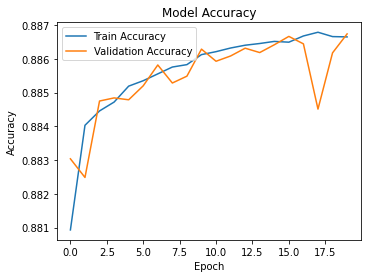

In [172]:
# График обучения
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

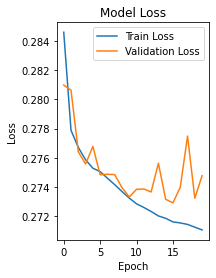

In [173]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

### Наилучшие метрики показала модель нейронной сети. Тем не менее, модели можно улучшить с подбором гиперпараметров. Сохраняем скрипт модели нейронной сети для запуска инференса.

In [174]:
# Сохранение модели нейронной сети
model.save('NN_model.keras')


## Применение модели нейронной сети к предобработанному тестовому датасету

In [175]:
X_test_pre = df_test_scaled

In [176]:
X_test_pre.head()

,age,serum_cholestoral,oldpeak,sex_1,chest_1,chest_2,chest_3,chest_4,fasting_blood_sugar_1,resting_electrocardiographic_results_1,resting_electrocardiographic_results_2,exercise_induced_angina_1,slope_2,slope_3,number_of_major_vessels_1,number_of_major_vessels_2,number_of_major_vessels_3,thal_6,thal_7
0,-0.098010,-0.246536,-0.295793,True,False,False,False,True,False,False,True,True,False,False,False,True,False,False,True
1,-0.537192,-0.445061,-0.919521,True,False,False,False,True,False,False,True,True,False,False,True,False,False,False,True
2,-1.964534,1.961029,-0.644910,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,0.011786,0.014581,-0.649122,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True
4,1.878310,-0.746882,-0.023646,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [177]:
X_test_pre1 = pd.concat([ID,X_test_pre],axis=1)

In [178]:
X_test_pre1.head()

,ID,age,serum_cholestoral,oldpeak,sex_1,chest_1,chest_2,chest_3,chest_4,fasting_blood_sugar_1,resting_electrocardiographic_results_1,resting_electrocardiographic_results_2,exercise_induced_angina_1,slope_2,slope_3,number_of_major_vessels_1,number_of_major_vessels_2,number_of_major_vessels_3,thal_6,thal_7
0,600000,-0.098010,-0.246536,-0.295793,True,False,False,False,True,False,False,True,True,False,False,False,True,False,False,True
1,600001,-0.537192,-0.445061,-0.919521,True,False,False,False,True,False,False,True,True,False,False,True,False,False,False,True
2,600002,-1.964534,1.961029,-0.644910,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,600003,0.011786,0.014581,-0.649122,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True
4,600004,1.878310,-0.746882,-0.023646,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [179]:
X_test_pre.shape

(359813, 19)

In [180]:
y_pred_test_prob=model.predict(X_test_pre)
y_pred_test = (y_pred_test_prob > 0.5).astype(int).flatten()  # конвертация предсказанных вероятностей в бинарный класс (0 или 1)

11245/11245 ━━━━━━━━━━━━━━━━━━━━ 6s 538us/step


In [181]:
y_pred_test.shape

(359813,)

In [182]:
col=pd.DataFrame({'class':y_pred_test})

In [183]:
col1=pd.concat([X_test_pre1['ID'],col],axis=1)

In [184]:
col1.head()

,ID,class
0,600000,1.0
1,600001,1.0
2,600002,0.0
3,600003,0.0
4,600004,0.0


In [185]:
# Сохранение результата работы модели нейронной сети в файл submission_file.csv
col1.to_csv(r"submission_file.csv",index=False,header=True)